<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Prophet_Rossmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [2]:
from prophet import Prophet

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv

In [11]:
df = pd.read_csv("rossmann_train.csv",low_memory = False)

In [12]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


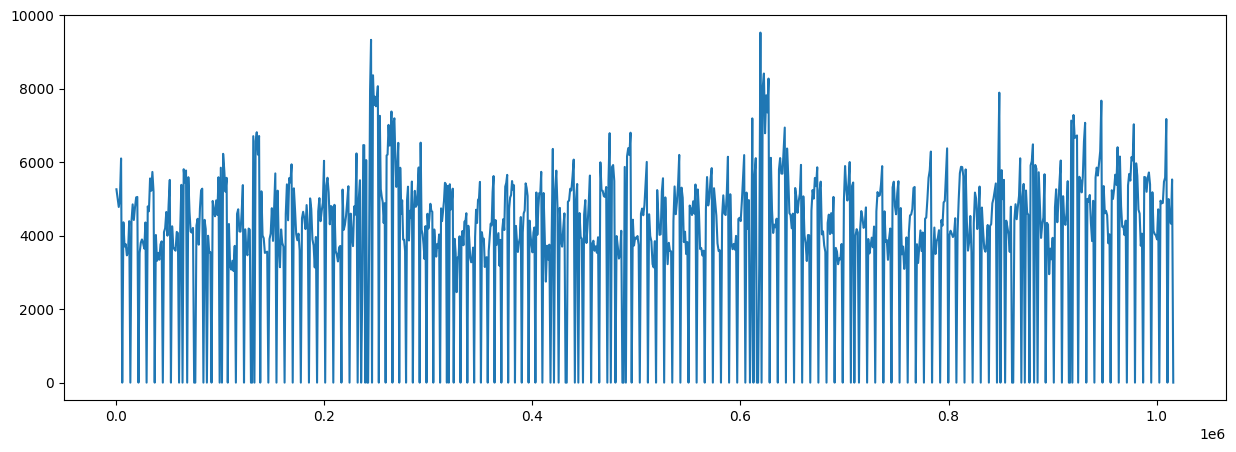

In [13]:
df[df['Store'] == 1]['Sales'].plot(figsize = (15,5));

In [14]:
(df[df['Store'] == 1]['Sales'] == 0).sum()

161

In [19]:
(df[df['Store'] == 1]['Open'] == 0).sum()

161

In [17]:
store1 = df[df['Store'] == 1].copy()

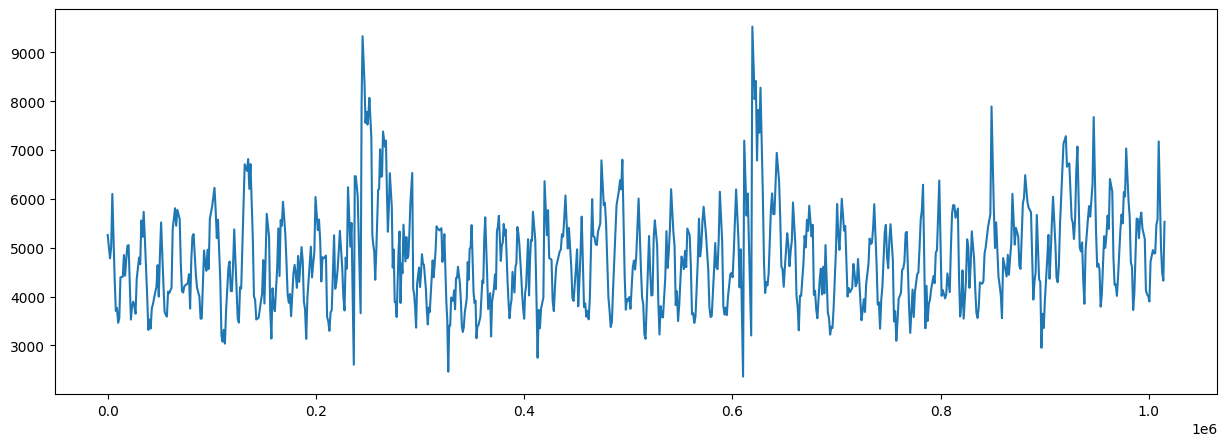

In [18]:
#No need to calculate the time series when the store is closed
store1[store1['Open'] > 0]['Sales'].plot(figsize = (15,5));

In [23]:
sales0 = store1[store1['Sales'] == 0].index
customer0 = store1[store1['Customers'] == 0].index
store_closed = store1[store1['Open'] == 0].index
print(np.all(sales0 == customer0))
print(np.all(store_closed == customer0))

True
True


In [21]:
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [24]:
store1['Date'] = pd.to_datetime(store1['Date'])

In [25]:
store1.set_index('Date',inplace = True)

In [26]:
store1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


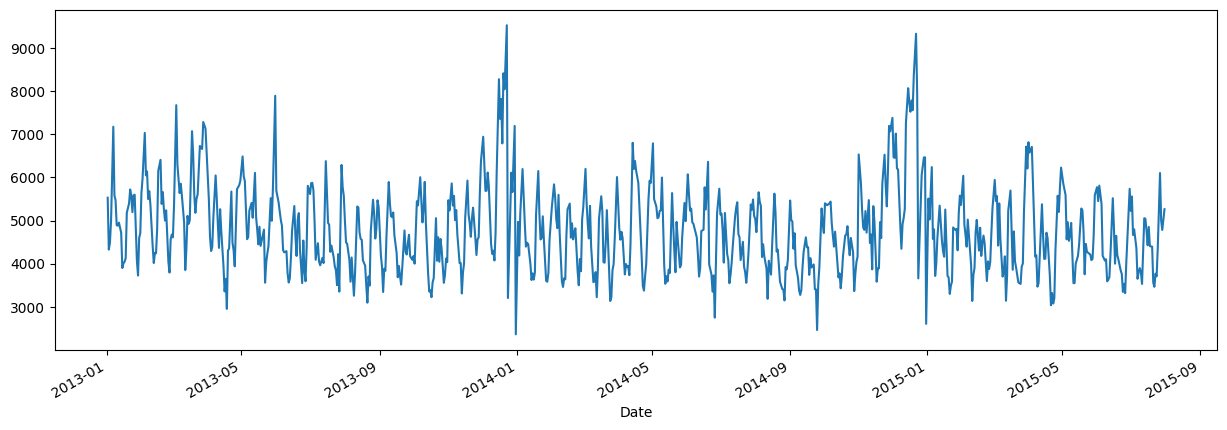

In [27]:
store1[store1['Customers'] > 0]['Sales'].plot(figsize = (15,5));

In [28]:
df_p = store1[['Sales']].copy()

In [30]:
df_p['Date']  = df_p.index

In [31]:
df_p.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [32]:
df_p.tail()

,Sales,Date
Date,,
2013-01-05,4997,2013-01-05
2013-01-04,4486,2013-01-04
2013-01-03,4327,2013-01-03
2013-01-02,5530,2013-01-02
2013-01-01,0,2013-01-01


In [33]:
df_p.sort_index(inplace = True)

In [34]:
df_p.head(20)

,Sales,Date
Date,,
2013-01-01,0,2013-01-01
2013-01-02,5530,2013-01-02
2013-01-03,4327,2013-01-03
2013-01-04,4486,2013-01-04
2013-01-05,4997,2013-01-05
2013-01-06,0,2013-01-06
2013-01-07,7176,2013-01-07
2013-01-08,5580,2013-01-08
2013-01-09,5471,2013-01-09


In [35]:
df_p.tail()

,Sales,Date
Date,,
2015-07-27,6102,2015-07-27
2015-07-28,5011,2015-07-28
2015-07-29,4782,2015-07-29
2015-07-30,5020,2015-07-30
2015-07-31,5263,2015-07-31


In [44]:
df_p.columns = ['y','ds']

In [37]:
m = Prophet()

In [ ]:
m.fit(df_p)

In [46]:
#Make the periods that we want to forecast
future = m.make_future_dataframe(periods = 365)

In [47]:
future.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [48]:
future.tail()

,ds
1302,2016-07-26
1303,2016-07-27
1304,2016-07-28
1305,2016-07-29
1306,2016-07-30


In [49]:
forecast = m.predict(future)

In [50]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1302,2016-07-26,3737.006584,3035.172735,5919.237428,3712.572209,3762.228002,712.976598,712.976598,712.976598,706.327351,706.327351,706.327351,6.649247,6.649247,6.649247,0.0,0.0,0.0,4449.983182
1303,2016-07-27,3736.790476,2987.219571,5667.239360,3712.260156,3762.180957,502.194964,502.194964,502.194964,510.548409,510.548409,510.548409,-8.353445,-8.353445,-8.353445,0.0,0.0,0.0,4238.985441
1304,2016-07-28,3736.574369,2458.290561,5387.874385,3711.945199,3762.074372,126.297608,126.297608,126.297608,151.277962,151.277962,151.277962,-24.980354,-24.980354,-24.980354,0.0,0.0,0.0,3862.871977
1305,2016-07-29,3736.358262,2789.895984,5723.458691,3711.631552,3761.969942,530.730605,530.730605,530.730605,573.629123,573.629123,573.629123,-42.898519,-42.898519,-42.898519,0.0,0.0,0.0,4267.088867
1306,2016-07-30,3736.142155,3231.865321,6080.582028,3711.304232,3761.884562,937.345499,937.345499,937.345499,999.100089,999.100089,999.100089,-61.754591,-61.754591,-61.754591,0.0,0.0,0.0,4673.487653


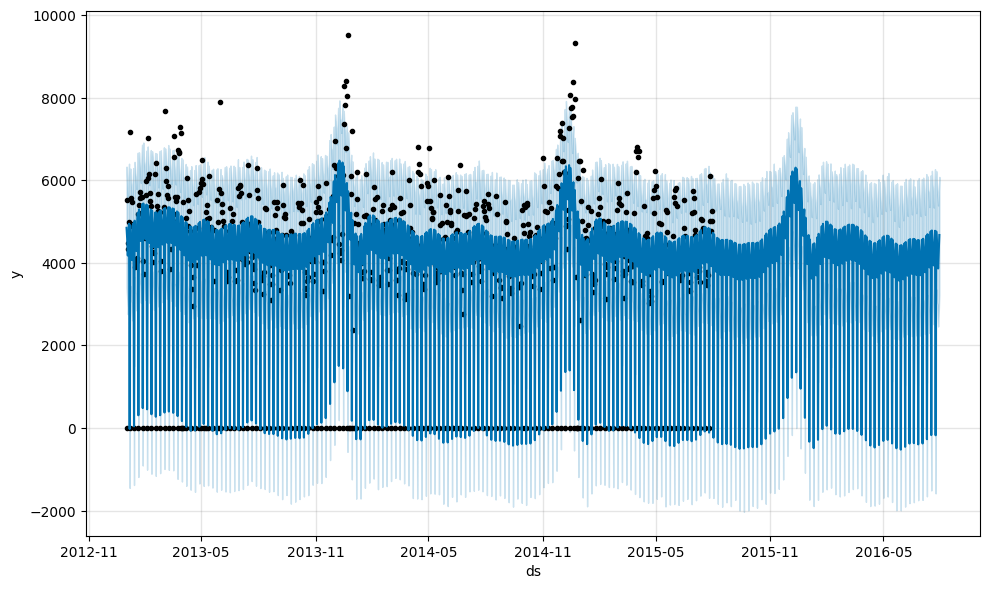

In [52]:
m.plot(forecast);

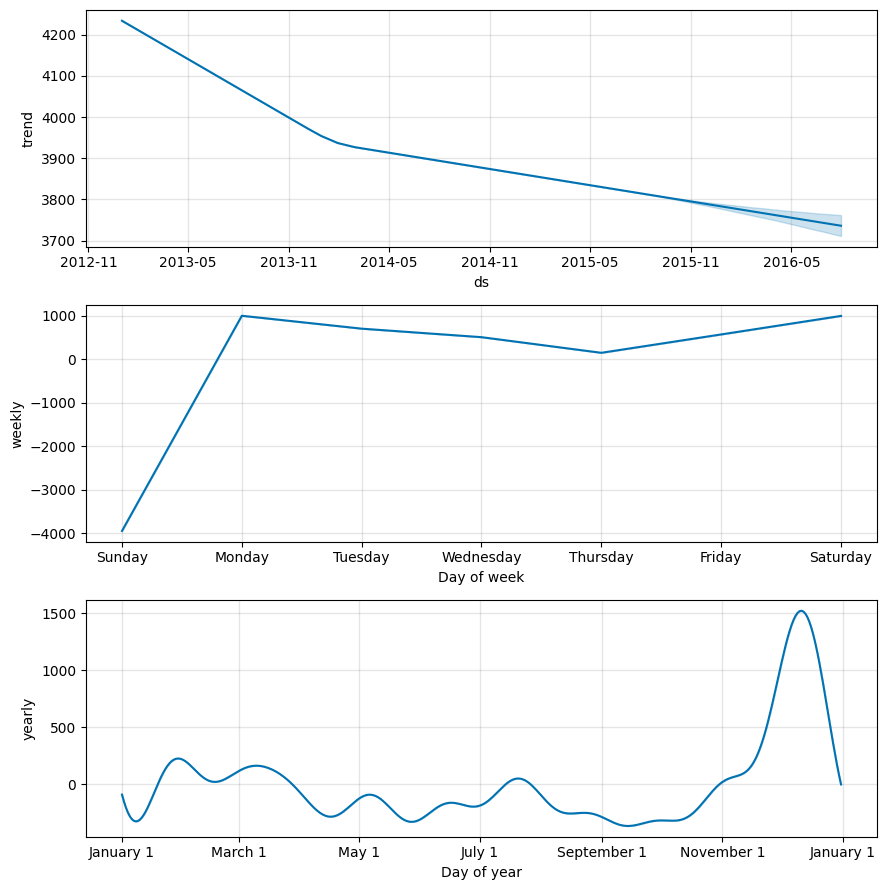

In [54]:
m.plot_components(forecast);

# **Model Open Days only**

In [60]:
df_p2 = store1[store1['Open'] > 0][['Sales']].copy()

In [61]:
df_p2['Date'] = df_p2.index

In [62]:
df_p2.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [63]:
df_p2.columns = ['y','ds']

In [ ]:
m2 = Prophet()
m2.fit(df_p2)
future2 = m2.make_future_dataframe(periods = 365)
forecast2 = m2.predict(future2)

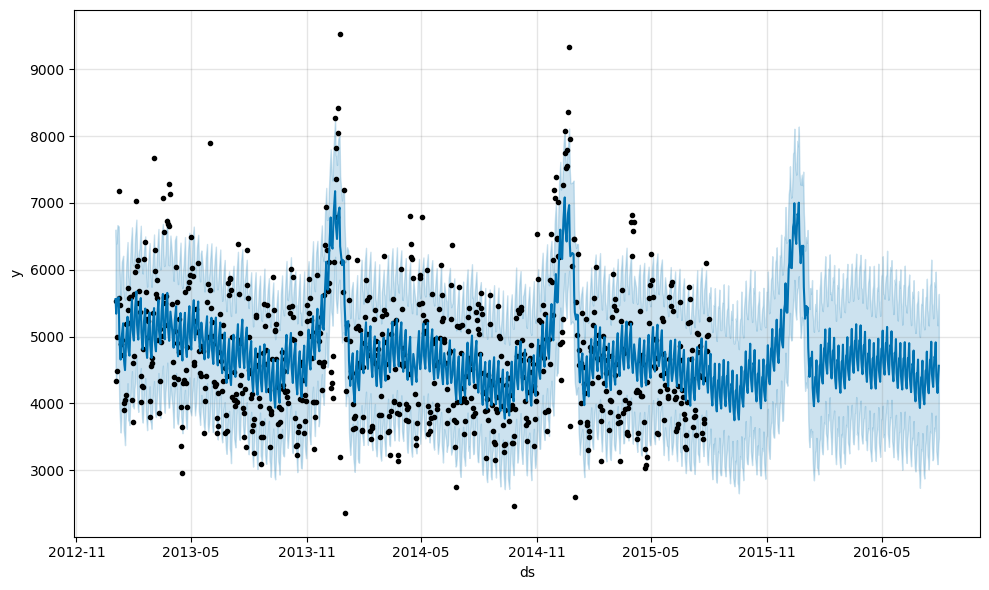

In [67]:
m2.plot(forecast2);

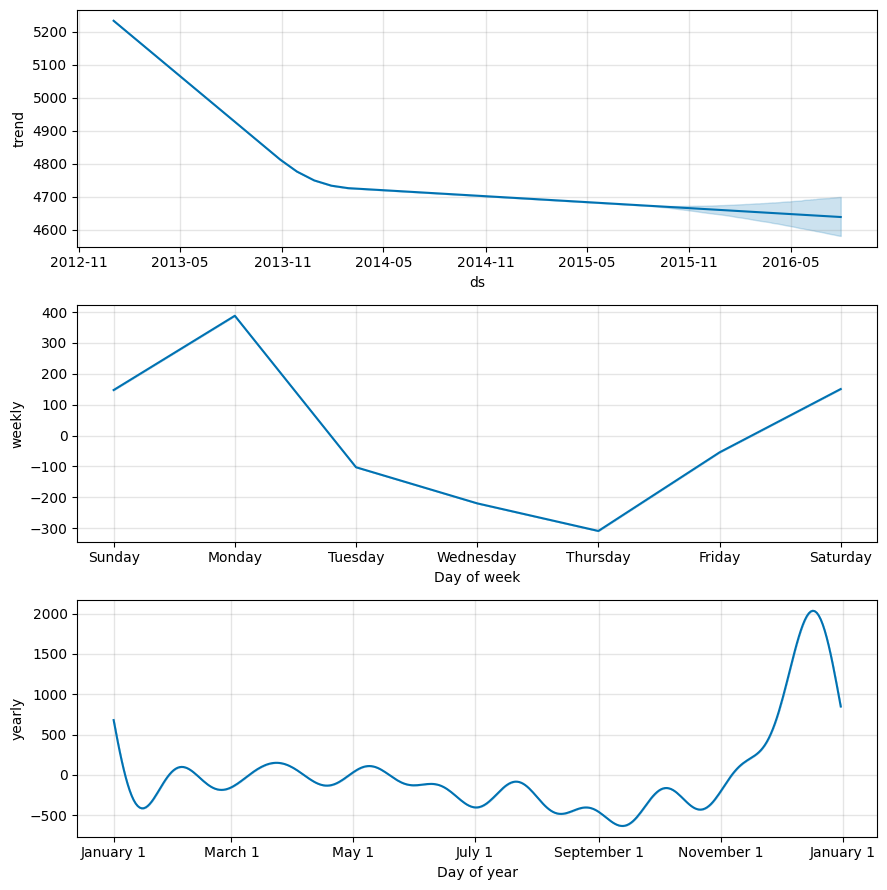

In [68]:
m2.plot_components(forecast2);